In [11]:
import json
import numpy as np

# anno = json.load(open('data/Thumos14/Thumos14_annotations.json'))
anno = json.load(open('data/ActivityNet13/ActivityNet13_annotations.json'))
video_anno = anno['database']
list_duration = []
list_seg = []
count = 0
for vn, annos in video_anno.items():
    if annos['subset'] == "val":
        list_duration.append(annos['duration'])
        for seg in annos['annotations']:
            time = seg['segment'][1]-seg['segment'][0]
            list_seg.append(time)
        count = count + 1

x = np.sort(list_seg)
y = np.sort(list_duration)
print(x)
print(y)
print(sum(y)/count)

[  0.           0.           0.         ... 266.971      277.76528327
 300.31687075]
[  1.10205717   2.06666667   2.33566667 ... 360.36       619.26666667
 745.44      ]
117.70481736230505


In [36]:
import torch
import math

feature_length = 20
window_size = 5
slice_overlap = 0.75
slide = window_size*(1-slice_overlap)
num_complete_slices = math.floor((feature_length-window_size)/slide) + 1
print(num_complete_slices)
slices = [[int(i*slide), int((i*slide)+window_size-1)] for i in range(num_complete_slices)]

print(slices)

13
[[0, 4], [1, 5], [2, 6], [3, 7], [5, 9], [6, 10], [7, 11], [8, 12], [10, 14], [11, 15], [12, 16], [13, 17], [15, 19]]


## Load the result on ActivityNet1.3

In [ ]:
import json

res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/ablation/activitynet1.3/v8_49_detection_val_93_raw.json")) # base
# res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/ablation/activitynet1.3/v8_3_detection_val_66_raw.json")) # + actionness
# res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/ablation/activitynet1.3/v8_11_detection_val_23_raw.json"))  # + refine
# res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/ablation/activitynet1.3/v8_38_detection_val_47_raw.json"))   # + actionness + refine
video_id = "-r_bvqjYjYg"
print(len(res['results'][video_id]))
sorted_res = sorted(res['results'][video_id],key=lambda proposal: proposal['score'],reverse=True)
sorted_res

## Load the result on Thumos14
- 注意在Thumos14的detection_val文件是来自binary的预测

In [4]:
import json

# res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/ablation/thumos14/v8_1_2_detection_test_20_raw.json")) # base
# res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/ablation/thumos14/v8_3_2_detection_test_27_raw.json")) # + actionness
# res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/ablation/thumos14/v8_2_detection_test_28_raw.json"))  # + refine
res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/ablation/thumos14/v8_4_detection_test_47_raw.json"))   # + actionness + refine
video_id = "video_test_0000701"
print(len(res['results'][video_id]))
sorted_res = sorted(res['results'][video_id],key=lambda proposal: proposal['score'],reverse=True)
sorted_res

63


[{'segment': [33.75581798553467, 36.559617614746095],
  'label': 'foreground',
  'score': 0.9322927594184875},
 {'segment': [41.011495208740236, 43.496554946899415],
  'label': 'foreground',
  'score': 0.6405093669891357},
 {'segment': [0.0, 2.035987138748169],
  'label': 'foreground',
  'score': 0.5843626856803894},
 {'segment': [24.414079666137695, 26.966567993164062],
  'label': 'foreground',
  'score': 0.5690291523933411},
 {'segment': [19.165910720825195, 26.19584846496582],
  'label': 'foreground',
  'score': 0.5622686147689819},
 {'segment': [51.2, 51.877654147148135],
  'label': 'foreground',
  'score': 0.3823162019252777},
 {'segment': [15.770899772644043, 24.16823387145996],
  'label': 'foreground',
  'score': 0.35898956656455994},
 {'segment': [0.26186221837997437, 2.563830614089966],
  'label': 'foreground',
  'score': 0.19559548795223236},
 {'segment': [59.64246864318848, 61.15080089569092],
  'label': 'foreground',
  'score': 0.11501629650592804},
 {'segment': [59.2898656

### Load the change of applying refinement, just in inference. Thumos14

In [ ]:
import json

# res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/refine/thumos_binary_v8_2_detection_test_47_before_refine_raw.json")) # before refine
res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/refine/thumos_binary_v8_2_detection_test_47_after_refine_raw.json")) # after refine

video_id = "video_test_0000073"
print(len(res['results'][video_id]))
sorted_res = sorted(res['results'][video_id],key=lambda proposal: proposal['score'],reverse=True)
sorted_res

### Load the change of applying refinement, just in inference. ActivityNet1.3

In [ ]:
import json

res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/refine/ant13_binary_v8_2_detection_test_47_before_refine_raw.json")) # before refine
# res = json.load(open("D:/Jia-Run/Zero_Shot_TAL/论文写作/画图/refine/ant13_binary_v8_2_detection_test_47_after_refine_raw.json")) # after refine

video_id = "-r_bvqjYjYg"
print(len(res['results'][video_id]))
sorted_res = sorted(res['results'][video_id],key=lambda proposal: proposal['score'],reverse=True)
sorted_res

In [34]:
import numpy as np
input_dets = np.random.random((5,4))
print(input_dets)
sort_idx = input_dets[:, 2].argsort()[::-1]
dets = input_dets[sort_idx, :]
print(dets)
np.where(dets[:,2]<=0.01)[0]

[[0.71611393 0.96510105 0.71217216 0.18761535]
 [0.13681803 0.81023881 0.8162105  0.48607804]
 [0.24997616 0.52386834 0.37161187 0.65872146]
 [0.71864529 0.42397581 0.22944962 0.90087491]
 [0.47526494 0.06547175 0.0770536  0.09212093]]
[[0.13681803 0.81023881 0.8162105  0.48607804]
 [0.71611393 0.96510105 0.71217216 0.18761535]
 [0.24997616 0.52386834 0.37161187 0.65872146]
 [0.71864529 0.42397581 0.22944962 0.90087491]
 [0.47526494 0.06547175 0.0770536  0.09212093]]


array([], dtype=int64)

In [10]:
# check_repeat video file

video_name = list()
# /mnt/Datasets/COIN/videos/0/-8NaVGEccgc.mp4
with open("C:/Users/14988/Desktop/HACS_video_dir_list.txt") as f:
    for line in f.readlines():
        vn = line.strip().split('/')[-1]
        video_name.append(vn)
print(len(video_name))

visited = set()
redundant_items = [x for x in video_name if x in visited or (visited.add(x) or False)]
print(redundant_items)

# print(video_name)


5641
['v_GkDRj1GlHig.mp4', 'v_Qe-tz6I222M.mp4', 'v_4n8zXCsLycU.mp4', 'v_oDyKqL-bnVw.mp4']


In [3]:
import torch
import torch.nn as nn

def inverse_sigmoid(x, eps=1e-5):
    x = x.clamp(min=0, max=1)
    x1 = x.clamp(min=eps)
    x2 = (1 - x).clamp(min=eps)
    return torch.log(x1/x2)


num_queries = 3
feat = torch.empty((6,4)).uniform_(0,1)
print(feat)
idx = torch.tensor([0,1,2])
a = feat[idx,:]
print(a)

tensor([[0.3682, 0.8972, 0.3394, 0.3260],
        [0.1439, 0.8706, 0.7251, 0.2740],
        [0.7318, 0.2247, 0.8523, 0.5513],
        [0.4105, 0.7412, 0.4069, 0.6733],
        [0.4753, 0.3614, 0.4514, 0.3871],
        [0.3681, 0.5327, 0.9832, 0.0176]])
tensor([[0.3682, 0.8972, 0.3394, 0.3260],
        [0.1439, 0.8706, 0.7251, 0.2740],
        [0.7318, 0.2247, 0.8523, 0.5513]])


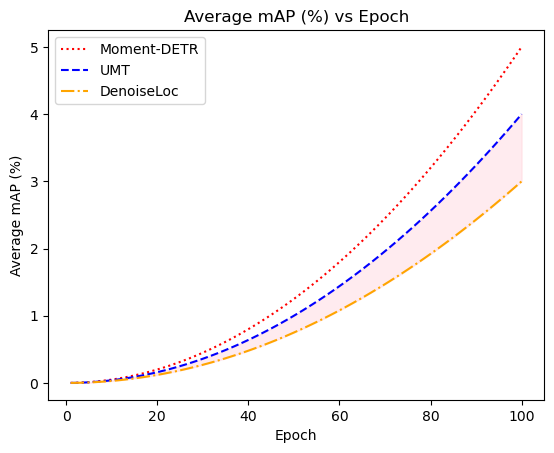

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的数据
epochs = np.arange(1, 101)
moment_detr = np.array([i**2 * 0.0005 for i in epochs])  # 假设的Moment-DETR性能数据
umt = np.array([i**2 * 0.0004 for i in epochs])          # 假设的UMT性能数据
denoiseloc = np.array([i**2 * 0.0003 for i in epochs])   # 假设的DenoiseLoc性能数据

# 创建图形和轴对象
fig, ax = plt.subplots()

# 绘制曲线
ax.plot(epochs, moment_detr, color='red', label='Moment-DETR', linestyle=':')
ax.plot(epochs, umt, color='blue', label='UMT', linestyle='--')
ax.plot(epochs, denoiseloc, color='orange', label='DenoiseLoc', linestyle='-.')

# 添加填充颜色，假设我们填充UMT和DenoiseLoc之间的区域
ax.fill_between(epochs, umt, denoiseloc, color='pink', alpha=0.3)

# 添加图例
ax.legend()

# 设置图表标题和轴标签
ax.set_title('Average mAP (%) vs Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Average mAP (%)')

# 显示图表
plt.show()
